# Import Libraries

In [1]:
import numpy
import pandas
import warnings
import tensorflow
import os
import sys
import nltk
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
warnings.filterwarnings("ignore")
%matplotlib inline

# Load Data

# EDA(Exploratory Data Analysis)

In [2]:
df = pd.read_csv("h_artists_songs.csv")
df.head()

,Artist_Name,Song_Title,Year,Lyrics_URL,Lyrics
0,H1GHR MUSIC,H1GHR,2020,https://www.azlyrics.com/lyrics/h1ghrmusic/h1g...,\n\r\nH1GHR\nH1GHR\nH1GHR\n\nThe clique gettin...
1,H1GHR MUSIC,Melanin Handsome,2020,https://www.azlyrics.com/lyrics/h1ghrmusic/mel...,\n\n[Romanized:]\n\nNone of your business\nEot...
2,H1GHR MUSIC,How We Rock,2020,https://www.azlyrics.com/lyrics/h1ghrmusic/how...,\n\n[Romanized:]\n\nThis is how we rock yeah\n...
3,H1GHR MUSIC,DDDD Freestyle (뚝딱Freestyle),2020,https://www.azlyrics.com/lyrics/h1ghrmusic/ddd...,\n\n[Romanized:]\n\nToo many hustlers' here\nO...
4,H1GHR MUSIC,4eva,2020,https://www.azlyrics.com/lyrics/h1ghrmusic/4ev...,\n\n[Romanized:]\n\nH1GHR than the sky so fire...


In [3]:
df.tail()

,Artist_Name,Song_Title,Year,Lyrics_URL,Lyrics
34567,HyunA,I'm Not Cool,2021,https://www.azlyrics.com/lyrics/hyuna/imnotcoo...,\n\n[Romanized:]\n\nMaltuwa haengdongeul kkumi...
34568,HyunA,GOOD GIRL,2021,https://www.azlyrics.com/lyrics/hyuna/goodgirl...,\n\n[Romanized:]\n\nNaneun malhae I don't care...
34569,HyunA,Show Window,2021,https://www.azlyrics.com/lyrics/hyuna/showwind...,\n\n[Romanized:]\n\nYojeum ttara yeminhae deo\...
34570,HyunA,"Party, Feel, Love",2021,https://www.azlyrics.com/lyrics/hyuna/partyfee...,\n\r\n무뎌져 My pain\n난 너를 보면 타올라\n취할 것 같아 Awake\...
34571,HyunA,FLOWER SHOWER,2021,https://www.azlyrics.com/lyrics/hyuna/flowersh...,\n\n[Romanized:]\n\nI just wanna be your flowe...


In [4]:
df.columns

Index(['Artist_Name', 'Song_Title', 'Year', 'Lyrics_URL', 'Lyrics'], dtype='object')

In [5]:
df.shape

(34572, 5)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Artist_Name    0
Song_Title     0
Year           0
Lyrics_URL     0
Lyrics         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34572 entries, 0 to 34571
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Artist_Name  34572 non-null  object
 1   Song_Title   34572 non-null  object
 2   Year         34572 non-null  int64 
 3   Lyrics_URL   34572 non-null  object
 4   Lyrics       34572 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [9]:
# creating new dataframe with just two variables, year and lyrics.
df1 = pd.DataFrame(df[['Year', 'Lyrics']])
df1.head()

,Year,Lyrics
0,2020,\n\r\nH1GHR\nH1GHR\nH1GHR\n\nThe clique gettin...
1,2020,\n\n[Romanized:]\n\nNone of your business\nEot...
2,2020,\n\n[Romanized:]\n\nThis is how we rock yeah\n...
3,2020,\n\n[Romanized:]\n\nToo many hustlers' here\nO...
4,2020,\n\n[Romanized:]\n\nH1GHR than the sky so fire...


In [10]:
df1.tail()

,Year,Lyrics
34567,2021,\n\n[Romanized:]\n\nMaltuwa haengdongeul kkumi...
34568,2021,\n\n[Romanized:]\n\nNaneun malhae I don't care...
34569,2021,\n\n[Romanized:]\n\nYojeum ttara yeminhae deo\...
34570,2021,\n\r\n무뎌져 My pain\n난 너를 보면 타올라\n취할 것 같아 Awake\...
34571,2021,\n\n[Romanized:]\n\nI just wanna be your flowe...


In [11]:
# Creating a list object for all lyrics

lyrics = df1['Lyrics'].tolist()
lyrics[0:2]

['\n\r\nH1GHR\nH1GHR\nH1GHR\n\nThe clique getting big bring a bigger table\nAll we do is win name a bigger label\nKings and Queens come claim your throne\nThe fallen angels singing our song they\nTried dying a legacy only to fail\nThis is the jungle not for the weak and frail\nYield the power given otherwise lose it\nLook at how we living H1GHR MUSIC\nLook at how we living H1GHR MUSIC\nLook at how we living H1GHR MUSIC\nAV and Souf Souf the streets on lock\nJay Park; Sik-K the kings of pop\nPH-1; HAON yeah they never flop\nLook at how we living H1GHR MUSIC\nChaCha my partner in crime dollar signs\nGochild; Phe REDS; BIG Naughty; WOOGIE; and GroovyRoom\nH1GHR MUSIC we killin father time\nCause we foreva; foreva eva was outcasted\nThey try to kill us but we back alive\nThis the motha fuckin H1GHR academy TRADE L\nWelcome to the family yeah you can\'t refute it\nLook at how we living H1GHR MUSIC\n\nH1GHR\nWe livin\' it up H1GHR\nH1GHR\nH1GHR\nEverything we do we make it golden\nH1GHR\nWe 

### Cleaning Data

In [12]:
# Removing whitespace characters (tabs, new line, etc.) from lyrics
lyrics = [re.sub('\s+', ' ', text) for text in lyrics]

# Removing non-English letters from lyrics
lyrics = [re.sub('[^a-zA-Z0-9]+', ' ',text) for text in lyrics]

# Removing word 'Romanized' from lyrics' text
lyrics = [re.sub('Romanized', ' ', text) for text in lyrics]

lyrics[0:2]

[' H1GHR H1GHR H1GHR The clique getting big bring a bigger table All we do is win name a bigger label Kings and Queens come claim your throne The fallen angels singing our song they Tried dying a legacy only to fail This is the jungle not for the weak and frail Yield the power given otherwise lose it Look at how we living H1GHR MUSIC Look at how we living H1GHR MUSIC Look at how we living H1GHR MUSIC AV and Souf Souf the streets on lock Jay Park Sik K the kings of pop PH 1 HAON yeah they never flop Look at how we living H1GHR MUSIC ChaCha my partner in crime dollar signs Gochild Phe REDS BIG Naughty WOOGIE and GroovyRoom H1GHR MUSIC we killin father time Cause we foreva foreva eva was outcasted They try to kill us but we back alive This the motha fuckin H1GHR academy TRADE L Welcome to the family yeah you can t refute it Look at how we living H1GHR MUSIC H1GHR We livin it up H1GHR H1GHR H1GHR Everything we do we make it golden H1GHR We just keep movin up H1GHR Yea we re up here in the 

In [13]:
# Transforming each song lyrics into its lowercase form and tokenizition its element

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import punkt

tokenized_lyrics = []
for song in lyrics:
    
    tokenized_lyrics.append(nltk.word_tokenize(song.lower()))
    
# Reviewing tokenized lyrics for first two songs 
print(tokenized_lyrics[0:2])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['h1ghr', 'h1ghr', 'h1ghr', 'the', 'clique', 'getting', 'big', 'bring', 'a', 'bigger', 'table', 'all', 'we', 'do', 'is', 'win', 'name', 'a', 'bigger', 'label', 'kings', 'and', 'queens', 'come', 'claim', 'your', 'throne', 'the', 'fallen', 'angels', 'singing', 'our', 'song', 'they', 'tried', 'dying', 'a', 'legacy', 'only', 'to', 'fail', 'this', 'is', 'the', 'jungle', 'not', 'for', 'the', 'weak', 'and', 'frail', 'yield', 'the', 'power', 'given', 'otherwise', 'lose', 'it', 'look', 'at', 'how', 'we', 'living', 'h1ghr', 'music', 'look', 'at', 'how', 'we', 'living', 'h1ghr', 'music', 'look', 'at', 'how', 'we', 'living', 'h1ghr', 'music', 'av', 'and', 'souf', 'souf', 'the', 'streets', 'on', 'lock', 'jay', 'park', 'sik', 'k', 'the', 'kings', 'of', 'pop', 'ph', '1', 'haon', 'yeah', 'they', 'never', 'flop', 'look', 'at', 'how', 'we', 'living', 'h1ghr', 'music', 'chacha', 'my', 'partner', 'in', 'crime', 'dollar', 'signs', 'gochild', 'phe', 'reds', 'big', 'naughty', 'woogie', 'and', 'groovyroom', 

In [14]:
# Importing stopwords library from nltk
from nltk.corpus import stopwords
import nltk
nltk.download("words")
nltk.download("stopwords")
words = set(nltk.corpus.words.words())

# Iterating through tokenized lyrics to remove stopwords 
for song in tokenized_lyrics:
    for word in song:
        if ((word in stopwords.words('english')) or (word not in words)):
            song.remove(word)
            
#Ttokenized lyrics after the removal of stopwords            
print(tokenized_lyrics[0:2])

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\avina\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['clique', 'getting', 'big', 'bring', 'bigger', 'table', 'is', 'win', 'name', 'bigger', 'label', 'come', 'claim', 'throne', 'fallen', 'singing', 'song', 'tried', 'dying', 'legacy', 'fail', 'is', 'jungle', 'weak', 'and', 'frail', 'yield', 'power', 'given', 'otherwise', 'lose', 'look', 'how', 'living', 'music', 'look', 'how', 'living', 'music', 'look', 'how', 'living', 'music', 'and', 'souf', 'streets', 'lock', 'jay', 'park', 'k', 'kings', 'pop', '1', 'yeah', 'never', 'flop', 'look', 'how', 'living', 'music', 'my', 'partner', 'crime', 'dollar', 'gochild', 'reds', 'big', 'naughty', 'and', 'music', 'killin', 'father', 'time', 'cause', 'foreva', 'eva', 'outcasted', 'try', 'kill', 'us', 'back', 'alive', 'the', 'fuckin', 'academy', 'trade', 'l', 'welcome', 'the', 'family', 'yeah', 'can', 'refute', 'look', 'how', 'living', 'music', 'h1ghr', 'everything', 'do', 'make', 'it', 'golden', 'h1ghr', 'we', 'keep', 'h1ghr', 'yea', 'we', 're', 'here', 'the', 'we', 'been', 'up', 'here', 'still', 'h1ghr'

In [15]:
# Lemmatizing (reducing all words to their linguistic core)
import nltk
nltk.download("wordnet")
lemmatizer = nltk.stem.WordNetLemmatizer() 
lamm_lyrics = []

for song in tokenized_lyrics:
    lamm_song = [lemmatizer.lemmatize(word) for word in song]
    lamm_lyrics.append(lamm_song)
        
print(lamm_lyrics[0:2])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\avina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[['clique', 'getting', 'big', 'bring', 'bigger', 'table', 'is', 'win', 'name', 'bigger', 'label', 'come', 'claim', 'throne', 'fallen', 'singing', 'song', 'tried', 'dying', 'legacy', 'fail', 'is', 'jungle', 'weak', 'and', 'frail', 'yield', 'power', 'given', 'otherwise', 'lose', 'look', 'how', 'living', 'music', 'look', 'how', 'living', 'music', 'look', 'how', 'living', 'music', 'and', 'souf', 'street', 'lock', 'jay', 'park', 'k', 'king', 'pop', '1', 'yeah', 'never', 'flop', 'look', 'how', 'living', 'music', 'my', 'partner', 'crime', 'dollar', 'gochild', 'red', 'big', 'naughty', 'and', 'music', 'killin', 'father', 'time', 'cause', 'foreva', 'eva', 'outcasted', 'try', 'kill', 'u', 'back', 'alive', 'the', 'fuckin', 'academy', 'trade', 'l', 'welcome', 'the', 'family', 'yeah', 'can', 'refute', 'look', 'how', 'living', 'music', 'h1ghr', 'everything', 'do', 'make', 'it', 'golden', 'h1ghr', 'we', 'keep', 'h1ghr', 'yea', 'we', 're', 'here', 'the', 'we', 'been', 'up', 'here', 'still', 'h1ghr', 'y

In [16]:
song_lengths = []

for song in lamm_lyrics:
    length = len(song)
    song_lengths.append(length)
    
df2 = pd.DataFrame(df1)

# Replacing the content in lyrics column with tokenized and lammetized versions of lyrics
df2['Lyrics'] = lamm_lyrics

# Adding to df2 a column with the length of lyrics
df2['Song_length'] = song_lengths  #<-- adding to df1 a column with lyrics lengths

df2.head()

,Year,Lyrics,Song_length
0,2020,"[clique, getting, big, bring, bigger, table, i...",139
1,2020,"[none, your, business, bangbeobi, gane, kill, ...",501
2,2020,"[rock, yeah, never, yeah, busy, guap, yeah, 4e...",607
3,2020,"[many, here, tageona, uri, ppaemyeon, ne, saen...",376
4,2020,"[than, sky, fire, yes, m, feeling, fish, compl...",409


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34572 entries, 0 to 34571
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         34572 non-null  int64 
 1   Lyrics       34572 non-null  object
 2   Song_length  34572 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 810.4+ KB


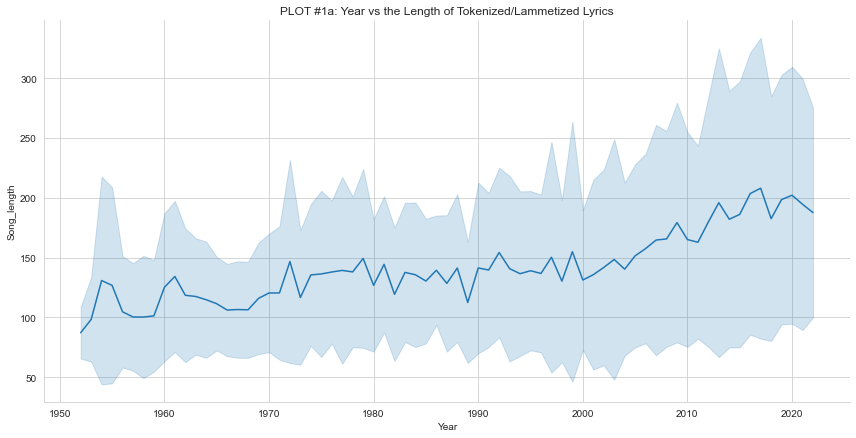

In [35]:
# Plotting the length of songs as a function of a year it was recorded in. 
sns.relplot(data=df2, x='Year', y='Song_length', kind="line", aspect=2, height=6, 
            ci="sd").set(title="PLOT #1a: Year vs the Length of Tokenized/Lammetized Lyrics")
sns.set_style("darkgrid")
plt.show()

# Pre-processing Data of Lyrics with All Words

In [19]:
# Normalizing lenghts of songs' lyrics

from sklearn.preprocessing import MinMaxScaler

lengths = pd.DataFrame(df2['Song_length'])

scaler = MinMaxScaler() 

# Creating an array with normalized lengths
scaled_lengths = scaler.fit_transform(lengths)[:,0]

# Review of results of normalization (values should be between 0 and 1)
print(f'Max length: {scaled_lengths.max()}')
print(f'Min lenght: {scaled_lengths.min()}')
print(f'Data type: {scaled_lengths.dtype}')
print(f'Number of songs: {len(scaled_lengths)}')
scaled_lengths

Max length: 0.9999999999999999
Min lenght: 0.0
Data type: float64
Number of songs: 34572


array([0.10057887, 0.36251809, 0.43921852, ..., 0.1447178 , 0.07525326,
       0.31837916])

In [20]:
# Adding to df2 a column with normalized length values 
df2['Scaled_length'] = scaled_lengths
df2.head()

,Year,Lyrics,Song_length,Scaled_length
0,2020,"[clique, getting, big, bring, bigger, table, i...",139,0.100579
1,2020,"[none, your, business, bangbeobi, gane, kill, ...",501,0.362518
2,2020,"[rock, yeah, never, yeah, busy, guap, yeah, 4e...",607,0.439219
3,2020,"[many, here, tageona, uri, ppaemyeon, ne, saen...",376,0.272069
4,2020,"[than, sky, fire, yes, m, feeling, fish, compl...",409,0.295948


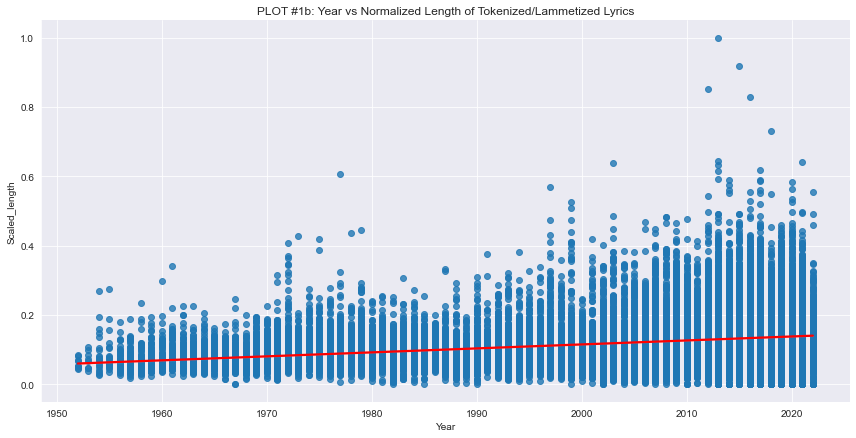

In [21]:
# Running additional vis for normalized lengths
sns.lmplot(data=df2, x='Year', y='Scaled_length', aspect=2, height=6, line_kws={'color':'red'}).set(title=
            "PLOT #1b: Year vs Normalized Length of Tokenized/Lammetized Lyrics")
sns.set_style("whitegrid")

# Model Building & Training Model on Lyrics with All Words

In [22]:
# Running regression model:

# Creating linear regression model and the value of coefficient
from sklearn import linear_model 
from sklearn.model_selection import train_test_split 
import sklearn.metrics as metrics 

x = df2['Year'].values.reshape(-1,1)
y = df2['Scaled_length'].values.reshape(-1,1)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25) 
model = linear_model.LinearRegression()
model.fit(xtrain,ytrain) 
ypred_test=model.predict(xtest)
model.coef_ 

# Small value of coefficient (slope) suggests lack of significant correlation between year and lyrics' length

array([[0.00113607]])

In [23]:
# Now, instead of the total lenght of lyrics, we look at the number of unique words in each song:
df2.columns

Index(['Year', 'Lyrics', 'Song_length', 'Scaled_length'], dtype='object')

In [24]:
# Creating new dataframe to work with unique words instead of all words in lyrics
df3 = pd.DataFrame(df2['Year'])
df3['Unique_lyrics'] = [list(set(song)) for song in df2['Lyrics']]

# Examining if unique words were properly isolated
print(df2['Lyrics'][0])
print(df3['Unique_lyrics'][0])
df3.head()

['clique', 'getting', 'big', 'bring', 'bigger', 'table', 'is', 'win', 'name', 'bigger', 'label', 'come', 'claim', 'throne', 'fallen', 'singing', 'song', 'tried', 'dying', 'legacy', 'fail', 'is', 'jungle', 'weak', 'and', 'frail', 'yield', 'power', 'given', 'otherwise', 'lose', 'look', 'how', 'living', 'music', 'look', 'how', 'living', 'music', 'look', 'how', 'living', 'music', 'and', 'souf', 'street', 'lock', 'jay', 'park', 'k', 'king', 'pop', '1', 'yeah', 'never', 'flop', 'look', 'how', 'living', 'music', 'my', 'partner', 'crime', 'dollar', 'gochild', 'red', 'big', 'naughty', 'and', 'music', 'killin', 'father', 'time', 'cause', 'foreva', 'eva', 'outcasted', 'try', 'kill', 'u', 'back', 'alive', 'the', 'fuckin', 'academy', 'trade', 'l', 'welcome', 'the', 'family', 'yeah', 'can', 'refute', 'look', 'how', 'living', 'music', 'h1ghr', 'everything', 'do', 'make', 'it', 'golden', 'h1ghr', 'we', 'keep', 'h1ghr', 'yea', 'we', 're', 'here', 'the', 'we', 'been', 'up', 'here', 'still', 'h1ghr', 'ye

,Year,Unique_lyrics
0,2020,"[label, table, is, here, song, music, father, ..."
1,2020,"[baetgo, dna, got, bangbeobi, don, from, hal, ..."
2,2020,"[reason, son, got, take, is, ttaekkaji, body, ..."
3,2020,"[label, han, got, oneulgwa, don, tteoreojyeo, ..."
4,2020,"[han, son, got, ssayeogado, don, bik, moseubi,..."


In [25]:
# Creating a list of lengths for lyrics with unique words 
# And adding it to dataframe as a new column
unique_lengths = []

for song in df3['Unique_lyrics']:
    length = len(song)
    unique_lengths.append(length)
df3['Unique_length'] = unique_lengths
df3.head()    

,Year,Unique_lyrics,Unique_length
0,2020,"[label, table, is, here, song, music, father, ...",97
1,2020,"[baetgo, dna, got, bangbeobi, don, from, hal, ...",136
2,2020,"[reason, son, got, take, is, ttaekkaji, body, ...",212
3,2020,"[label, han, got, oneulgwa, don, tteoreojyeo, ...",210
4,2020,"[han, son, got, ssayeogado, don, bik, moseubi,...",198


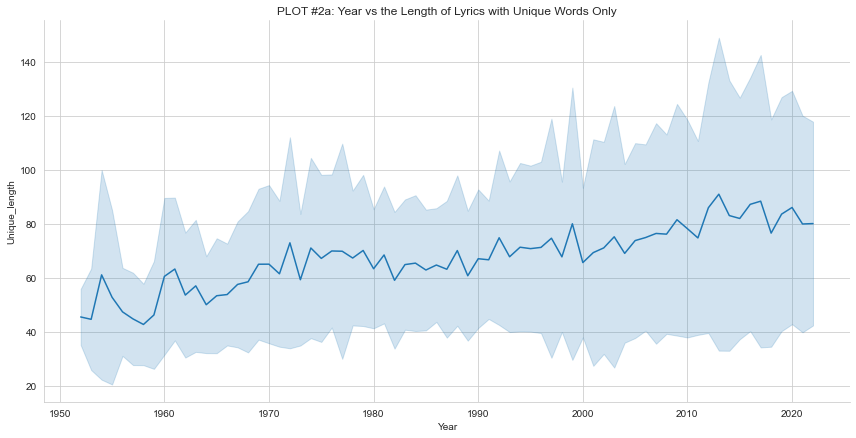

In [26]:
# Plotting values of lengths of lyrics(with unique words only) as a function of the year 
sns.relplot(data=df3, x='Year', y='Unique_length', kind="line", height=6,
            aspect=2, ci="sd").set(title="PLOT #2a: Year vs the Length of Lyrics with Unique Words Only")
sns.set_style("darkgrid")
plt.show()

# Pre-processing Lyrics Data with Unique Words

In [27]:
# Normalizing lenghts of songs' lyrics with unique words

lengths = pd.DataFrame(df3['Unique_length'])

scaler = MinMaxScaler() 

# Creating a list of normalized lengths for lyrics with unique words
scaled_unique_lengths = scaler.fit_transform(lengths)[:,0]

# Examining results of normalization (values should be between 0 and 1)
print(f'Max length: {scaled_unique_lengths.max()}')
print(f'Min lenght: {scaled_unique_lengths.min()}')
print(f'Data type: {scaled_unique_lengths.dtype}')
print(f'Number of songs: {len(scaled_unique_lengths)}')
scaled_unique_lengths

Max length: 1.0
Min lenght: 0.0
Data type: float64
Number of songs: 34572


array([0.18982387, 0.26614481, 0.4148728 , ..., 0.13502935, 0.0704501 ,
       0.25831703])

In [28]:
# Adding to df3 a column with normalized lengths of lyrics with unique words
df3['Scaled_unique_length'] = scaled_unique_lengths
df3.head()

,Year,Unique_lyrics,Unique_length,Scaled_unique_length
0,2020,"[label, table, is, here, song, music, father, ...",97,0.189824
1,2020,"[baetgo, dna, got, bangbeobi, don, from, hal, ...",136,0.266145
2,2020,"[reason, son, got, take, is, ttaekkaji, body, ...",212,0.414873
3,2020,"[label, han, got, oneulgwa, don, tteoreojyeo, ...",210,0.410959
4,2020,"[han, son, got, ssayeogado, don, bik, moseubi,...",198,0.387476


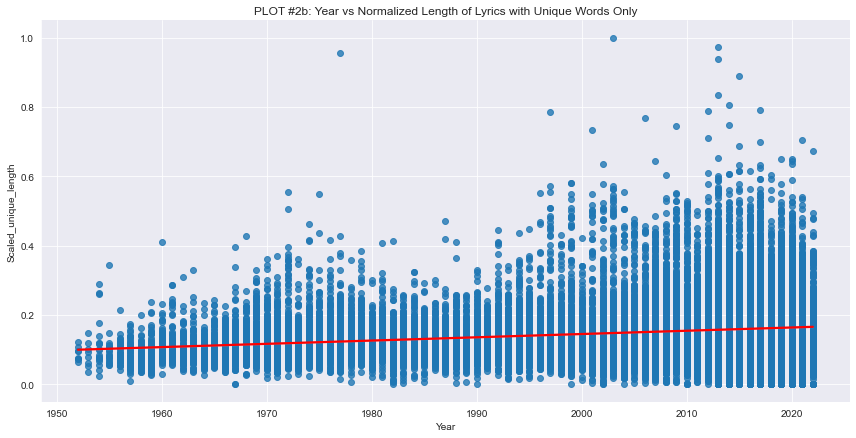

In [29]:
# Plotting the same as above using lmplot
sns.lmplot(data=df3, x='Year', y='Scaled_unique_length', height=6, aspect=2, 
           line_kws={'color':'red'}).set(title="PLOT #2b: Year vs Normalized Length of Lyrics with Unique Words Only")
sns.set_style("whitegrid")

# Model Building & Training Model on Unique Words

In [30]:
# Building and running simple regression model and obtaining the value for a coeficient
x = df3['Year'].values.reshape(-1,1)
y = df3['Scaled_unique_length'].values.reshape(-1,1)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25) 
model = linear_model.LinearRegression()
model.fit(xtrain,ytrain) 
ypred_test=model.predict(xtest)
model.coef_ #<-- still very small positive value of coefficient (slope) suggest lack of 
               # correlation between year and unique lyrics' length (similarly to the 
               # original tokenized lyrics length)

array([[0.00094982]])

In [31]:
print(df2.columns)  # <-- all words
print(df3.columns)  # <-- unique words

Index(['Year', 'Lyrics', 'Song_length', 'Scaled_length'], dtype='object')
Index(['Year', 'Unique_lyrics', 'Unique_length', 'Scaled_unique_length'], dtype='object')


In [32]:
# Creating new dataframe to work on ratio between unique and all words in each lyrics
df4 = pd.DataFrame(df2[['Year','Song_length']])
df4['Unique_length'] = df3['Unique_length'] 
try:
    df4['Ratio'] = df4['Unique_length'] / df4['Song_length']
except:
    df4['Ratio'] = 0
df4.head()   

,Year,Song_length,Unique_length,Ratio
0,2020,139,97,0.697842
1,2020,501,136,0.271457
2,2020,607,212,0.349259
3,2020,376,210,0.558511
4,2020,409,198,0.484108


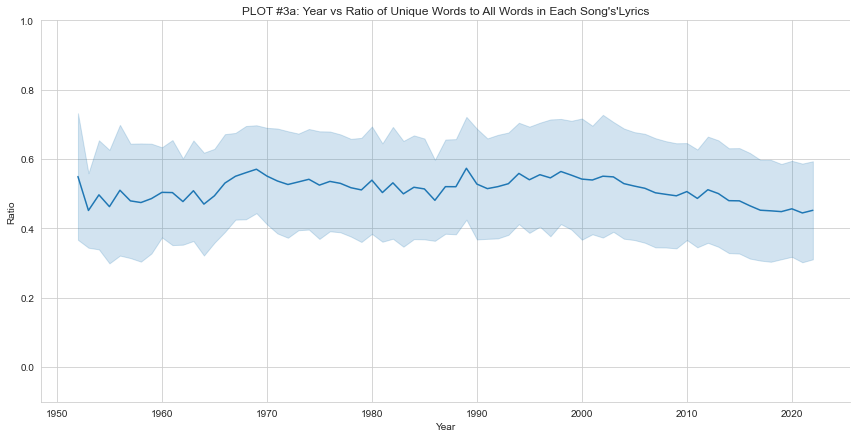

In [33]:
# Visualising the relationship between a year and the value of ratio (unique words to all words in a song)
sns.relplot(data=df4, x='Year', y='Ratio', kind="line", aspect=2, height=6, 
            ci="sd").set(title="PLOT #3a: Year vs Ratio of Unique Words to All Words in Each Song's'Lyrics")
sns.set_style("darkgrid")
plt.ylim(-0.1, 1)
plt.show()

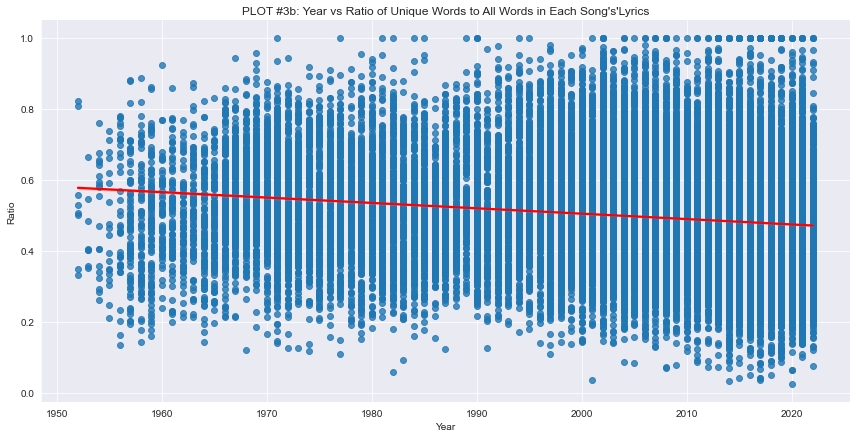

In [34]:
# Running additional plot using lmplot
sns.lmplot(data=df4, x='Year', y='Ratio', aspect=2, height=6, 
           line_kws={'color':'red'}).set(title="PLOT #3b: Year vs Ratio of Unique Words to All Words in Each Song's'Lyrics")
sns.set_style("whitegrid")

## Conclusion:

The main takeaway from the above analysis is that with the passing years since the 1950s, the recorded songs tend to contain more words (both, total and unique) yet the ratio between the number of unique words to a total number of words in songs is decreasing (i.e., increasing repetition of words in songs).

# Great Job!